In [1]:
%load_ext autoreload
%autoreload 2

import json
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d

In [2]:
with open('0021500495.json', 'r') as json_file:
    event_data = json.load(json_file)

In [3]:
# Function to draw basketball court
def create_court(ax, color, three_d=False):
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    
    # 3PT Arc
    three_arc = mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2)
    if three_d:
        art3d.pathpatch_2d_to_3d(three_arc, z=0,)
    
    ax.add_artist(three_arc)
    
    
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    key_circ =mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2)
    if three_d:
        art3d.pathpatch_2d_to_3d(key_circ, z=0,)
    ax.add_artist(key_circ)
    
    # Rim
    rim_circ = mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2)
    if three_d:
        art3d.pathpatch_2d_to_3d(rim_circ, z=0,)
    ax.add_artist(rim_circ)

    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    
    

In [4]:
def make_position_dataframe(event_data, target_team_id, target_player_id, target_event_id=None):
    
    event_df = pd.DataFrame()
    
    for event in event_data['events']:
        event_id = event['eventId']

        if target_event_id is not None and event_id != str(target_event_id):
            continue
        
        print(event_id)
        
        moment_df = pd.DataFrame()
        
        for moment in event['moments']:
            timestamp = moment[1]
            qtr = moment[0]
            qtr_rem = moment[2]
            shot_rem = moment[3]
            
            for player_pos_data in moment[5]:
                team_id = player_pos_data[0]
                player_id = player_pos_data[1]
                
                
                #if team_id ==target_team_id:
                    #import pdb; pdb.set_trace()
                
                if team_id==target_team_id and player_id==target_player_id:
                    
                    x = player_pos_data[2]
                    y = player_pos_data[3]
                    z = player_pos_data[4]
                    
                    row = {'eventId':event_id, 'timestamp':timestamp,
                          'qtr':qtr, 'qtr_rem':qtr_rem, 'shot_rem':shot_rem,
                          'team_id':team_id, 'player_id':player_id,
                          'x':x, 'y':y, 'z':z}
                    
                    moment_df = pd.concat([moment_df, pd.DataFrame([row])])
                    
            
        event_df = pd.concat([event_df, moment_df])
        
    return event_df
            
            
        
        

In [5]:
ball_data_lopez_ft = make_position_dataframe(event_data, -1, -1, 39)

39


In [6]:
ball_data_lopez_ft.iloc[-180:-120,:]

,eventId,timestamp,qtr,qtr_rem,shot_rem,team_id,player_id,x,y,z
0,39,1451765924952,1,505.0,23.12,-1,-1,15.05344,25.45209,12.34957
0,39,1451765924992,1,505.0,23.12,-1,-1,14.45026,25.33850,12.42169
0,39,1451765925033,1,505.0,23.12,-1,-1,13.74690,25.55649,12.83456
0,39,1451765925072,1,505.0,23.12,-1,-1,13.44288,25.55147,13.03757
0,39,1451765925112,1,505.0,23.12,-1,-1,12.92898,25.38994,13.21337
0,39,1451765925152,1,505.0,23.12,-1,-1,12.32861,25.23282,13.30643
0,39,1451765925192,1,505.0,23.11,-1,-1,11.77735,25.23592,13.22864
0,39,1451765925232,1,505.0,23.11,-1,-1,11.24645,25.16992,13.17032
0,39,1451765925272,1,505.0,23.11,-1,-1,10.82322,25.41363,13.25213
0,39,1451765925312,1,505.0,23.11,-1,-1,10.08742,25.22981,13.05722


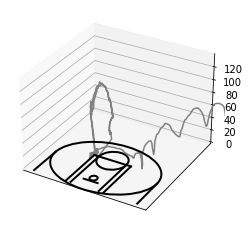

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = ball_data_lopez_ft.z.values*10
xline = (25-ball_data_lopez_ft.y.values)*10
yline = (ball_data_lopez_ft.x.values)*10
ax.plot3D(xline, yline, zline, 'gray')
create_court(ax, 'black', three_d=True)

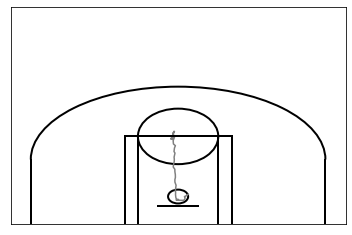

In [37]:
fig = plt.figure()
ax = plt.axes()
xline = (25-ball_data_lopez_ft.y.values[0:100])*10
yline = (ball_data_lopez_ft.x.values[0:100])*10
ax.plot(xline, yline, 'gray')
create_court(ax, 'black', )

In [38]:
ball_data_lopez_ft.x.values[0:100]

array([18.70579, 18.59624, 18.64299, 18.65825, 18.58089, 18.54528,
       18.55084, 18.57643, 18.67261, 18.59034, 18.63924, 18.53288,
       18.57896, 18.57643, 18.55613, 18.6207 , 18.61484, 18.4829 ,
       18.61484, 18.55128, 18.64588, 18.53237, 18.55277, 18.53179,
       18.4829 , 18.54484, 18.54484, 18.52675, 18.50865, 18.55209,
       18.45619, 18.57011, 18.43777, 18.39583, 18.54719, 18.53281,
       18.59863, 18.7439 , 19.0204 , 19.29292, 19.60663, 19.81184,
       19.93608, 20.07676, 20.08447, 19.98782, 19.81921, 19.82793,
       19.22042, 18.84971, 18.07844, 17.3612 , 16.9923 , 16.50736,
       15.72801, 15.39123, 14.52767, 14.05497, 13.60716, 12.77775,
       12.38029, 11.89661, 11.35999, 10.72575, 10.15166,  9.64577,
        9.12598,  8.42364,  7.87997,  7.37811,  6.84999,  6.42993,
        5.8408 ,  5.44567,  5.40268,  5.38012,  5.35378,  5.31345,
        5.26706,  5.25034,  5.2354 ,  5.2222 ,  5.21071,  5.20088,
        5.19267,  5.18605,  5.18097,  5.17739,  5.17527,  5.17

In [39]:
ball_data_lopez_ft.y.values[0:100]

array([25.82653, 25.83955, 25.86189, 25.88291, 25.81845, 25.77188,
       25.73903, 25.8297 , 25.9562 , 25.89725, 25.79434, 25.84812,
       25.88415, 25.8297 , 25.89882, 25.88169, 25.90137, 25.86443,
       25.90137, 25.83773, 25.79827, 25.927  , 25.85798, 25.94078,
       25.86443, 25.90768, 25.90768, 25.93144, 25.9552 , 25.9367 ,
       25.9561 , 26.0772 , 26.03987, 26.00648, 26.05297, 25.97994,
       26.01175, 25.89861, 25.82309, 25.75314, 25.78366, 25.7189 ,
       25.65287, 25.64482, 25.55321, 25.55132, 25.69462, 25.66988,
       25.69134, 25.53511, 25.74104, 25.69491, 25.40557, 25.54061,
       25.6105 , 25.46559, 25.59772, 25.5662 , 25.57807, 25.69257,
       25.7273 , 25.48725, 25.47834, 25.41036, 25.40205, 25.47894,
       25.47622, 25.30108, 25.35451, 25.40793, 25.37123, 25.38626,
       25.3433 , 25.2618 , 25.14514, 25.00923, 24.94395, 25.04539,
       25.28867, 25.27171, 25.22388, 25.14975, 25.05389, 24.94086,
       24.81524, 24.6816 , 24.5445 , 24.40852, 24.27823, 24.15

In [11]:
ball_data_lopez_ft.x.values[48]

19.22042

In [28]:
shot_moment = event_data['events'][33]['moments'][48]

In [30]:
def find_shooter(shot_moment):
    
    shooter_id = 0
    
    return shooter_id

In [34]:
assert find_shooter(shot_moment) == 203109

AssertionError: 

In [35]:
event_data['events'][33]

{'eventId': '39',
 'visitor': {'name': 'Brooklyn Nets',
  'teamid': 1610612751,
  'abbreviation': 'BKN',
  'players': [{'lastname': 'Larkin',
    'firstname': 'Shane',
    'playerid': 203499,
    'jersey': '0',
    'position': 'G'},
   {'lastname': 'Jack',
    'firstname': 'Jarrett',
    'playerid': 101127,
    'jersey': '2',
    'position': 'G'},
   {'lastname': 'Johnson',
    'firstname': 'Joe',
    'playerid': 2207,
    'jersey': '7',
    'position': 'F-G'},
   {'lastname': 'Bargnani',
    'firstname': 'Andrea',
    'playerid': 200745,
    'jersey': '9',
    'position': 'C-F'},
   {'lastname': 'Karasev',
    'firstname': 'Sergey',
    'playerid': 203508,
    'jersey': '10',
    'position': 'G-F'},
   {'lastname': 'Lopez',
    'firstname': 'Brook',
    'playerid': 201572,
    'jersey': '11',
    'position': 'C'},
   {'lastname': 'Sloan',
    'firstname': 'Donald',
    'playerid': 202388,
    'jersey': '15',
    'position': 'G'},
   {'lastname': 'Ellington',
    'firstname': 'Wayne',
